In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metrics = ["LC", "PI", "MA", "NBD", "ML", "D", "MI", "FO", "R", "E"]

In [3]:
def plot_hist(df):
    # Severity distribution
    df['Severity'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
    plt.title("Severity Distribution")
    plt.xlabel("Severity")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [4]:
def relation(df):
    severity_metrics = df.groupby("Severity")[metrics].mean()
    
    # Correlation heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(severity_metrics.T, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Relationship Between Severity and Source Code Metrics")
    plt.xlabel("Severity")
    plt.ylabel("Metrics")
    plt.show()


In [5]:
def time_severity(df):
    plt.figure(figsize=(12,5))
    sns.lineplot(x=df["ProjectVersion"], y=df["Severity"])
    plt.xticks(rotation=90)
    plt.title("Change in Severity Over Time")
    plt.xlabel("Project Version")
    plt.ylabel("Severity")
    plt.show()


In [6]:
train = pd.read_csv("train_scaled.csv")
train.head()

,project_name,project_version,label,code,code_comment,code_no_comment,lc,pi,ma,nbd,ml,d,mi,fo,r,e
0,Closure,144,2,"/**\r\n * Builds the function type, and puts i...","/**\r\n * Builds the function type, and puts i...",FunctionType buildAndRegister() {\r\n if (r...,0.545455,-0.124402,0.8,0.5,0.750000,0.289683,-0.431994,1.000000,-0.026316,0.411014
1,wicket,remotes/origin/bugs-dot-jar_WICKET-3764_48454f4d,1,/**\r\n * Returns whether or not this behavio...,/**\r\n * Returns whether or not this behavio...,public boolean isStateless(Component component...,-0.500000,-0.526316,-0.6,-1.0,-0.416667,-0.365079,1.109937,-0.500000,2.105263,-0.162793
2,Lang,22,3,/**\r\n * <p>Gets the greatest common divisor ...,/**\r\n * <p>Gets the greatest common divisor ...,private static int greatestCommonDivisor(int u...,0.863636,-0.009569,1.4,0.0,1.083333,6.281746,-0.607047,-0.333333,0.052632,7.865390
3,wicket,remotes/origin/bugs-dot-jar_WICKET-4841_ce172da8,1,/**\r\n * Returns base url without context or...,/**\r\n * Returns base url without context or...,@Override\r\npublic Url getClientUrl() {\r\n ...,0.227273,0.138756,0.2,1.0,0.750000,0.454365,-0.274982,1.583333,-0.026316,0.585170
4,jackrabbit-oak,remotes/origin/bugs-dot-jar_OAK-1977_4bfbfcdd,1,@Override\r\npublic Iterator<String> iterator(...,NaN,@Override\r\npublic Iterator<String> iterator(...,0.090909,0.799043,0.0,0.5,-0.083333,-0.063492,-0.087245,0.166667,0.000000,-0.026180


In [7]:
train.columns

Index(['project_name', 'project_version', 'label', 'code', 'code_comment',
       'code_no_comment', 'lc', 'pi', 'ma', 'nbd', 'ml', 'd', 'mi', 'fo', 'r',
       'e'],
      dtype='object')

In [8]:
d4j = pd.read_csv("data/d4j_methods_sc_metrics_comments.csv")
d4j.head()

,IsBuggy,ProjectName,ProjectVersion,Severity,StartLine,EndLine,LC,PI,MA,NBD,ML,D,MI,FO,R,E,SourceCode,CodeComment,CodeNoComment
0,True,Chart,1,Medium,1790,1822,32.0,5.70,10.0,4.0,16.0,10.24,81.29,11.0,0.0,4184.02,/**\n * Returns a (possibly empty) collection ...,/**\n * Returns a (possibly empty) collection ...,public LegendItemCollection getLegendItems() {...
1,True,Chart,2,Low,740,785,43.0,5.87,12.0,4.0,23.0,10.12,72.95,13.0,0.0,7492.06,/**\n * Iterates over the items in an {@link X...,/**\n * Iterates over the items in an {@link X...,public static Range iterateDomainBounds(XYData...
2,True,Chart,2,Low,1229,1289,52.0,5.70,15.0,5.0,29.0,12.69,67.45,20.0,0.0,13117.12,/**\n * Iterates over the data items of the xy...,/**\n * Iterates over the data items of the xy...,public static Range iterateRangeBounds(XYDatas...
3,True,Chart,5,Low,540,576,27.0,3.41,8.0,2.0,11.0,5.70,85.24,9.0,0.0,2019.18,/**\n * Adds or updates an item in the series ...,/**\n * Adds or updates an item in the series ...,"public XYDataItem addOrUpdate(Number x, Number..."
4,True,Chart,9,Medium,918,956,34.0,2.57,12.0,2.0,15.0,7.07,79.37,6.0,0.0,3165.86,/**\n * Creates a new timeseries by copying a ...,/**\n * Creates a new timeseries by copying a ...,public TimeSeries createCopy(RegularTimePeriod...


In [9]:
print(f"Veri kümesinde {d4j.shape[0]} satır ve {d4j.shape[1]} sütun var.")
print(d4j.isnull().sum())

Veri kümesinde 20921 satır ve 19 sütun var.
IsBuggy              0
ProjectName          0
ProjectVersion       0
Severity             0
StartLine            0
EndLine              0
LC                   0
PI                   0
MA                   0
NBD                  0
ML                   0
D                    0
MI                   0
FO                   0
R                    0
E                    0
SourceCode           0
CodeComment       6090
CodeNoComment        0
dtype: int64


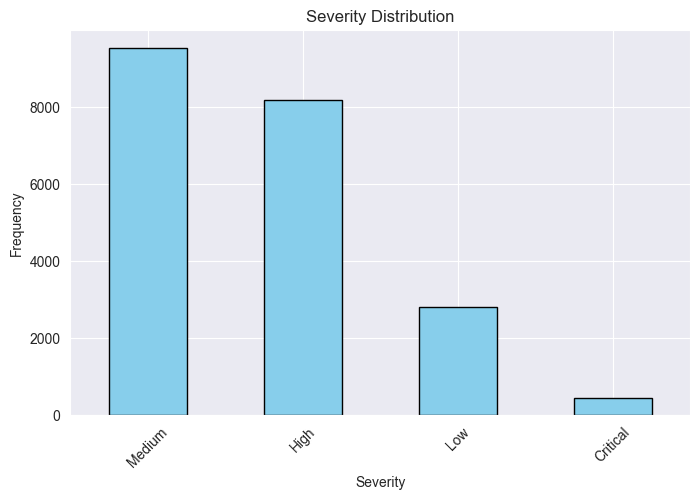

In [10]:
plot_hist(d4j)

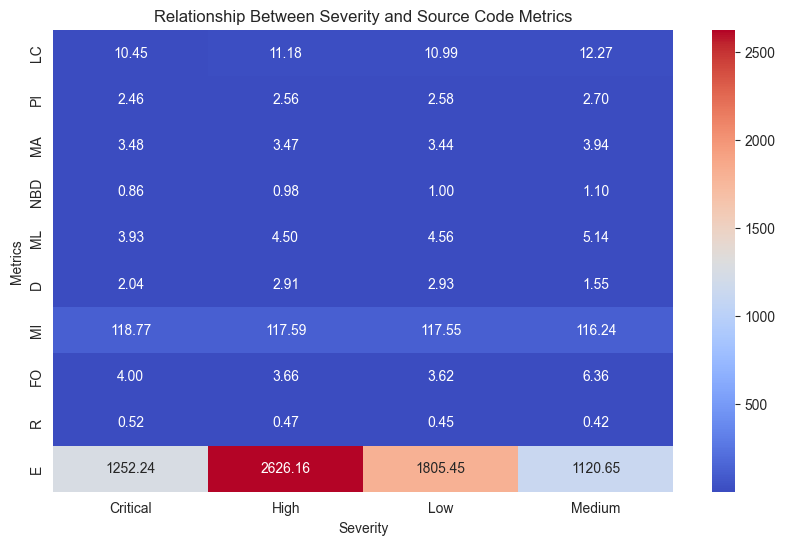

In [11]:
relation(d4j)

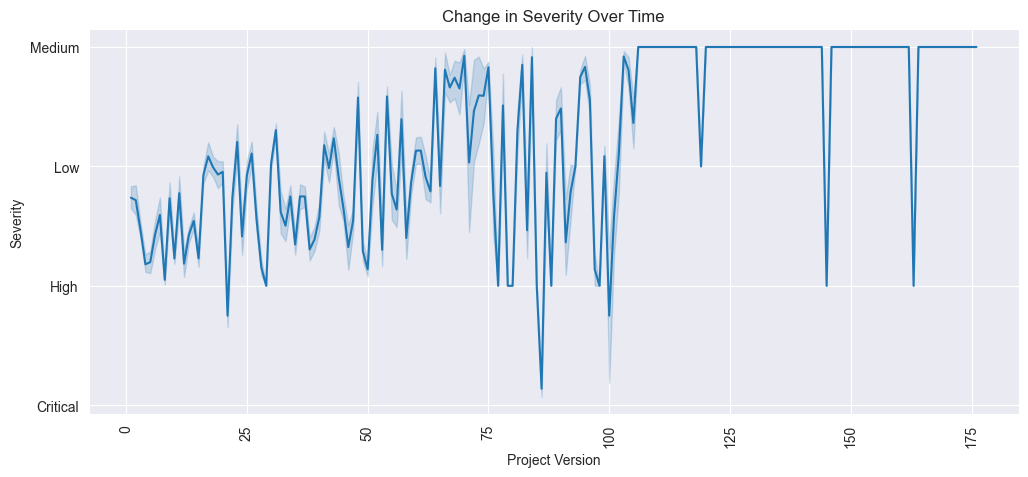

In [12]:
time_severity(d4j)

In [13]:
bugsjar = pd.read_csv("data/bugsjar_methods_sc_metrics_comments.csv")
bugsjar.head()

,IsBuggy,ProjectName,ProjectVersion,Severity,StartLine,EndLine,LC,PI,MA,NBD,ML,D,MI,FO,R,E,SourceCode,CodeComment,CodeNoComment
0,True,accumulo,remotes/origin/bugs-dot-jar_ACCUMULO-1044_9396...,Critical,75,228,122.0,5.57,49.0,7.0,73.0,18.28,40.56,48.0,0.00,51843.05,"public List<Short> check(Environment env, Muta...",NaN,"public List<Short> check(Environment env, Muta..."
1,True,accumulo,remotes/origin/bugs-dot-jar_ACCUMULO-1044_9396...,Critical,230,248,19.0,3.89,8.0,2.0,8.0,0.00,96.40,0.0,0.01,0.00,public String getViolationDescription(short vi...,NaN,public String getViolationDescription(short vi...
2,True,accumulo,remotes/origin/bugs-dot-jar_ACCUMULO-1044_ea2f...,Critical,75,228,122.0,5.57,49.0,7.0,73.0,18.28,40.56,48.0,0.00,51843.05,"public List<Short> check(Environment env, Muta...",NaN,"public List<Short> check(Environment env, Muta..."
3,True,accumulo,remotes/origin/bugs-dot-jar_ACCUMULO-1044_ea2f...,Critical,230,248,19.0,3.89,8.0,2.0,8.0,0.00,96.40,0.0,0.01,0.00,public String getViolationDescription(short vi...,NaN,public String getViolationDescription(short vi...
4,True,accumulo,remotes/origin/bugs-dot-jar_ACCUMULO-1051_25cf...,Trivial,180,191,11.0,2.95,2.0,1.0,0.0,0.00,107.28,4.0,0.23,0.00,@Override\npublic String toString() {\n Str...,NaN,@Override\npublic String toString() {\n Str...


In [14]:
print(f"Veri kümesinde {bugsjar.shape[0]} satır ve {bugsjar.shape[1]} sütun var.")
print(bugsjar.isnull().sum())

Veri kümesinde 59813 satır ve 19 sütun var.
IsBuggy               0
ProjectName           0
ProjectVersion        0
Severity              0
StartLine             0
EndLine               0
LC                    0
PI                    0
MA                    0
NBD                   0
ML                    0
D                     0
MI                    0
FO                    0
R                     0
E                     0
SourceCode            0
CodeComment       36892
CodeNoComment         0
dtype: int64


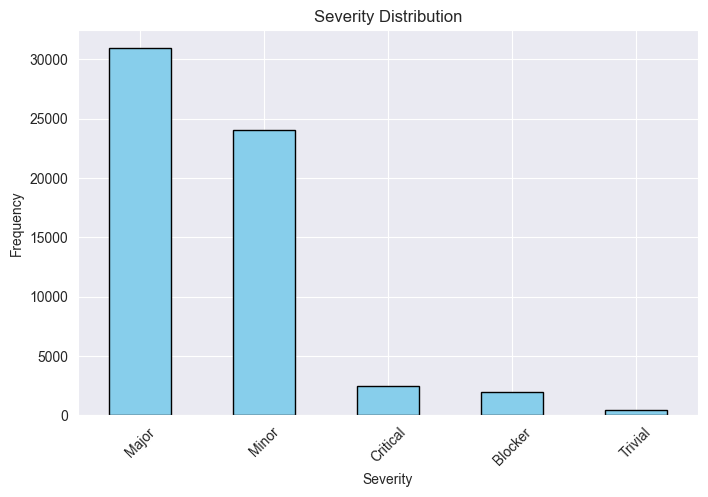

In [15]:
plot_hist(bugsjar)

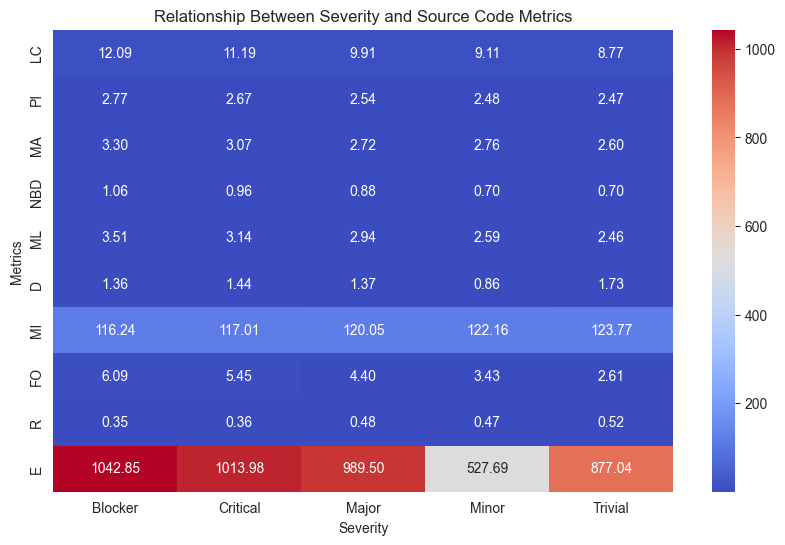

In [16]:
relation(bugsjar)